In [ ]:
#911 Calls

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('C:/Users/ACER/Desktop/911.csv')

In [5]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
lat          663522 non-null float64
lng          663522 non-null float64
desc         663522 non-null object
zip          583323 non-null float64
title        663522 non-null object
timeStamp    663522 non-null object
twp          663229 non-null object
addr         663522 non-null object
e            663522 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [7]:
#Top 5 zipcodes for 911 calls
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [8]:
#How many unique title codes are there
len(df['title'].unique())

148

In [ ]:
#If the title column value is EMS:BACK PAINS/INJURY, the Reason column would be EMS
x = df['title'].iloc[0]
x.split(':')[0]

In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [10]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
5             EMS
6             EMS
7             EMS
8             EMS
9         Traffic
10        Traffic
11        Traffic
12        Traffic
13        Traffic
14        Traffic
15        Traffic
16            EMS
17            EMS
18            EMS
19        Traffic
20        Traffic
21        Traffic
22           Fire
23        Traffic
24        Traffic
25            EMS
26            EMS
27           Fire
28        Traffic
29        Traffic
           ...   
663492        EMS
663493    Traffic
663494        EMS
663495       Fire
663496        EMS
663497        EMS
663498        EMS
663499        EMS
663500    Traffic
663501       Fire
663502        EMS
663503        EMS
663504    Traffic
663505        EMS
663506        EMS
663507    Traffic
663508        EMS
663509        EMS
663510       Fire
663511        EMS
663512        EMS
663513    Traffic
663514    Traffic
663515    Traffic
663516    

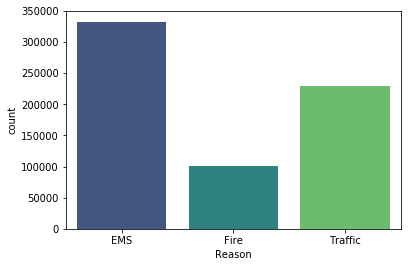

In [12]:
#Use seaborn to create a countplot of 911 calls by Reason
sns.countplot(x='Reason',data=df,palette='viridis')

In [13]:
#data type of the objects in the timeStamp column
type(df['timeStamp'].iloc[0])

str

In [16]:
#Use pd.to_datetime to convert the columns from strings to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[0]
time.hour

17

In [17]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [19]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
5         15
6         16
7         16
8         16
9         17
10        17
11        16
12        17
13        17
14        17
15        17
16        17
17        17
18        17
19        17
20        17
21        17
22        17
23        18
24        17
25        18
26        18
27        18
28        18
29        18
          ..
663492    14
663493    14
663494    14
663495    14
663496    15
663497    15
663498    15
663499    15
663500    15
663501    15
663502    15
663503    15
663504    15
663505    15
663506    15
663507    15
663508    15
663509    15
663510    15
663511    15
663512    15
663513    15
663514    15
663515    15
663516    15
663517    15
663518    15
663519    15
663520    15
663521    15
Name: Hour, Length: 663522, dtype: int64

In [21]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [22]:
#Use the .map() with this dictionary to map the actual string names to the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df['Day of Week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
5         Thu
6         Thu
7         Thu
8         Thu
9         Thu
10        Thu
11        Thu
12        Thu
13        Thu
14        Thu
15        Thu
16        Thu
17        Thu
18        Thu
19        Thu
20        Thu
21        Thu
22        Thu
23        Thu
24        Thu
25        Thu
26        Thu
27        Thu
28        Thu
29        Thu
         ... 
663492    Wed
663493    Wed
663494    Wed
663495    Wed
663496    Wed
663497    Wed
663498    Wed
663499    Wed
663500    Wed
663501    Wed
663502    Wed
663503    Wed
663504    Wed
663505    Wed
663506    Wed
663507    Wed
663508    Wed
663509    Wed
663510    Wed
663511    Wed
663512    Wed
663513    Wed
663514    Wed
663515    Wed
663516    Wed
663517    Wed
663518    Wed
663519    Wed
663520    Wed
663521    Wed
Name: Day of Week, Length: 663522, dtype: object

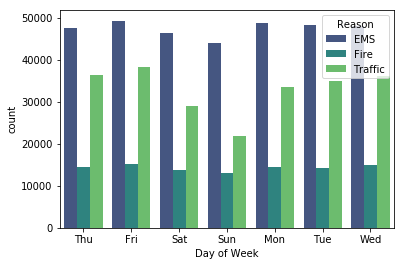

In [24]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

In [25]:
byMonth = df.groupby('Month').count()

In [26]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


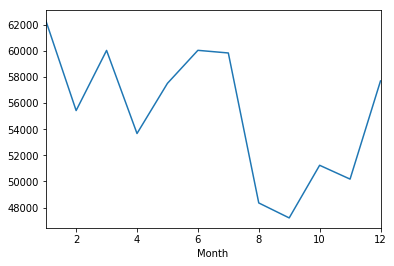

In [27]:
byMonth['lat'].plot()

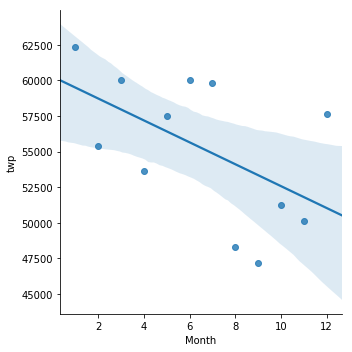

In [28]:
#Create a linear fit on the number of calls per month
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [30]:
#Create a new column called 'Date' that contains the date from the timeStamp column.
t = df['timeStamp'].iloc[0]
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

t.date()

datetime.date(2015, 12, 10)

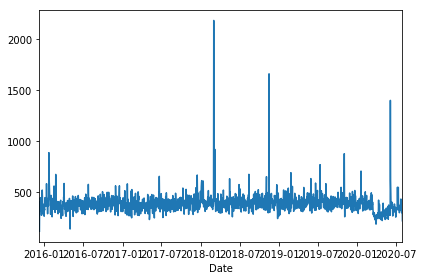

In [33]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()